# Exploration of Prosper Loan Data
## by Milica Nesic



## Preliminary Wrangling

ProsperLoanData dataset contains data from almost 85000 loans and 81 loan variables in the US for the period from November 2005 until March 2014. For the purpose of my exploration, I focused on the data after July 2009, since the categorization of the data changed for this point onwards. My focus was on exploring how Loan Amount, Term of Loan (duration of the loan) and Prosper Rating (the loan risk) affect the Borrower Rate.


In [1]:
# importing all packages, setting plots to be embedded inline, and setting pandas to show all the columns of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3 as sql
%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
# loading the dataset into loans data frame
loans = pd.read_csv("prosperLoanData.csv", parse_dates=["ListingCreationDate"])

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,

In [4]:
loans.ListingCreationDate.min(), loans.ListingCreationDate.max()

(Timestamp('2005-11-09 20:44:28.847000'),
 Timestamp('2014-03-10 12:20:53.760000'))

In [5]:
#checking for duplicates
loans[loans.duplicated(subset="ListingKey")]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,11.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053,NaN,60,Current,NaN,0.17710,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,7.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.000000,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037,NaN,60,Current,NaN,0.14528,0.1224,0.1124,0.10731,0.0424,0.06491,5.0,B,10.0,1,NJ,Police Officer/Correction Officer,Employed,107.0,True,False,NaN,2014-03-07 10:04:00,720.0,739.0,1996-07-01 00:00:00,19.0,18.0,27.0,15,1024.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,20802.0,0.40,26503.0,26.0,1.00,1.0,0.18,"$100,000+",True,10833.333333,DC303708663304668E74587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,135375,35000,2014-03-11 00:00:00,Q1 2014,07B33702526608187DB957A,782.81,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317,NaN,36,Current,NaN,0.35356,0.3134,0.3034,0.27598,0.1625,0.11348,1.0,HR,2.0,7,MI,Laborer,Employed,336.0,True,False,NaN,2013-09-26 09:35:36,640.0,659.0,1978-09-01 00:00:00,7.0,6.0,39.0,6,129.0,3.0,9.0,0.0,0.0,56.0,1.0,0.0,943.0,0.51,798.0,31.0,0.56,2.0,0.07,"$50,000-74,999",True,4583.333333,8D84369399064302947D8B5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,103928,4000,2013-10-01 00:00:00,Q4 2013,5E653693258374071BBC02C,172.76,863.8000,362.81,500.9900,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287,NaN,36,Current,NaN,0.24205,0.2045,0.1945,0.17970,0.0899,0.08980,4.0,C,4.0,1,GA,NaN,Other,0.0,True,False,NaN,2013-10-30 

In [6]:
#deleting duplicates
loans.drop_duplicates(subset="ListingKey", inplace=True)

In [7]:
#checking if the duplicates are deleted
loans[loans.duplicated(subset="ListingKey")]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [8]:
#excluding all the data before August 2009, because a lot of data categorizing has changed after July 2009
loans = loans[loans["ListingCreationDate"] >= "2009-08-01"]

In [9]:
#excluding the data where the category of the loan is unknown
loans = loans[~(loans["ListingCategory (numeric)"] == 0)]

In [10]:
loans.Term.unique()

array([36, 60, 12], dtype=int64)

In [11]:
#changing Term and ListingCategory variables datatype to category
loans["Term"] = loans["Term"].astype("category")
loans["ListingCategory (numeric)"] = loans["ListingCategory (numeric)"].astype("category")

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83781 entries, 1 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           83781 non-null  object        
 1   ListingNumber                        83781 non-null  int64         
 2   ListingCreationDate                  83781 non-null  datetime64[ns]
 3   CreditGrade                          0 non-null      object        
 4   Term                                 83781 non-null  category      
 5   LoanStatus                           83781 non-null  object        
 6   ClosedDate                           25804 non-null  object        
 7   BorrowerAPR                          83781 non-null  float64       
 8   BorrowerRate                         83781 non-null  float64       
 9   LenderYield                          83781 non-null  float64       
 10  Estimated

In [13]:
loans[["BorrowerRate", "LoanOriginalAmount"]].describe()

,BorrowerRate,LoanOriginalAmount
count,83781.000000,83781.000000
mean,0.196358,9072.698965
std,0.074722,6280.415469
min,0.040000,1000.000000
25%,0.135900,4000.000000
50%,0.187500,7500.000000
75%,0.257500,13500.000000
max,0.360000,35000.000000


### What is the structure of your dataset?

ProsperLoanData dataset contains data from almost 85000 loans and 81 loan variables in the US for the period from November 2005 until March 2014. Regarding the variables of interest for this exploration, two of them are numeric - BorrowerRate and LoanOriginalAmount and Term, while Term, ListingCategory (numeric) and ProsperRating (Alpha) are categorical with the following levels: <br>

(worst) ——> (best) <br>
Term: 12, 30, 60 <br>
ProsperRating (Alpha): HR, E, D, C, B, A, AA <br>

Listing Category represents the loan purpose categories, as follows:
- 0:'Not Available', 
- 1:'Debt Consolidation', 
- 2:'Home Improvement', 
- 3:'Business', 
- 4:'Personal Loan', 
- 5:'Student Use', 
- 6:'Auto', 
- 7:'Other', 
- 8:'Baby&Adoption', 
- 9:'Boat', 
- 10:'Cosmetic Procedure', 
- 11:'Engagement Ring', 
- 12:'Green Loans', 
- 13:'Household Expenses', 
- 14:'Large Purchases', 
- 15:'Medical/Dental', 
- 16:'Motorcycle', 
- 17:'RV', 
- 18:'Taxes', 
- 19:'Vacation', 
- 20:'Wedding Loans'

### What is/are the main feature(s) of interest in your dataset?

My focus was on exploring what affects the BorrowerRate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I intend to explore how LoanOriginalAmount, Term of Loan (duration of the loan) and Prosper Rating (the loan risk) affect the approved Loan Amount.

## Univariate Exploration

I intend to start by exploring the variable of interest, BorrowerRate, and then continue with exploring each of the independent variables.


C:\Users\nesic\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


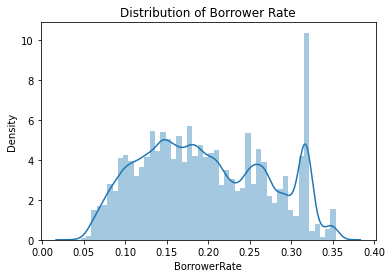

In [14]:
sb.distplot(loans.BorrowerRate)
plt.title("Distribution of Borrower Rate");

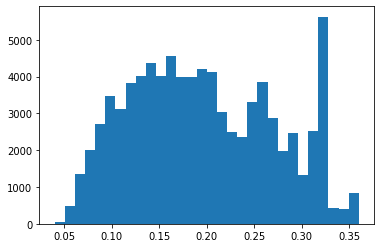

In [15]:
plt.hist(x="BorrowerRate", data=loans, bins=30);

Text(0.5, 1.0, 'Box plot of Borrower Rate')

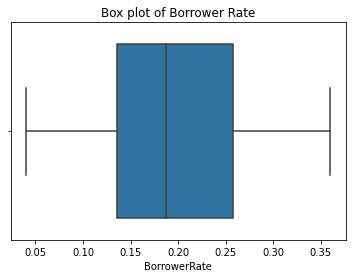

In [16]:
sb.boxplot(x="BorrowerRate", data=loans)
plt.title("Box plot of Borrower Rate")

From the histogram, we can notice that the distribution of Borrower Rate is multimodal and slightly right skewed. The box plot shows us there are no outliers, with minimum and maximum values at 0.02 and 0.36, respectively. The Median value is 0.19 which means 50% of the loans fall below this rate. What is interesting to further explore is the reason behind the high number of loans at around 32% borrower rate. <br>

I would like to quickly explore this occurance in code, to better understand the reason behind it and see if it makes sense using the variables I choose for the exploration of BorrowerRate.

In [17]:
loans[(loans["BorrowerRate"]>0.321) & (loans["BorrowerRate"]<0.331)].groupby(["BorrowerRate", "ProsperRating (Alpha)"]).agg({"ListingKey":"count", "LoanOriginalAmount":"mean"}).dropna()

ListingKey  LoanOriginalAmount
BorrowerRate ProsperRating (Alpha)                                
0.3220       E                             129         4807.255814
0.3225       E                               1         5000.000000
0.3227       E                               1         1000.000000
0.3232       D                               2        12500.000000
             E                              37         3790.810811
0.3233       E                               1         1000.000000
0.3234       D                               1        10000.000000
0.3238       D                               1         6000.000000
0.3239       HR                              1         1200.000000
0.3240       HR                              1         3000.000000
0.3244       D                               6        11666.666667
0.3248       HR                              2         6500.000000
0.3249       HR                              2         1250.000000
0.3250       C                               1         7500.000000
             D                               1         8000.000000
             HR                              2         3150.000000
0.3258       E                              45         3808.888889
0.3265       E                               1         1100.000000
0.3267       E                               2         7250.000000
             HR                              1         2000.000000
0.3269       HR                              1         1500.000000
0.3270       HR                              1         1500.000000
0.3275       HR                              3         3433.333333
0.3276       E                               1         7000.000000
0.3280       E                               2         1850.000000
             HR                              2         2500.000000
0.3283       HR                              1         2500.000000
0.3285       E                               2         1500.000000
             HR                              1         3000.000000
0.3288       E                               2         2250.000000
0.3289       HR                              1         2500.000000
0.3290       E                               4         5803.500000
             HR                              3         3250.000000
0.3294       E                               1         2500.000000
0.3295       E                               1         2000.000000
             HR                              1         3000.000000
0.3297       HR                              1         1800.000000
0.3299       E                               1         1500.000000
             HR                              1         4000.000000
0.3300       D                               1         1500.000000
             E                              15         3403.333333
             HR                             21         2901.190476
0.3304       E                             346         3795.809249

After froupping the values by BorrowerRate and ProsperRating it wasn't hard to notice that all of the prosper categories were high-risk ones. I also want to point out that the Loan Amounts for the most occuring ones are not that high, and usually in category E. I will present this graphically in the multivariate exploration later on. <br>

Next, I will proceed to explore the LoanOriginalAmount.

Text(0.5, 1.0, 'Distribution of Loan Amount')

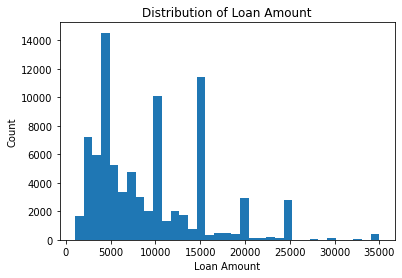

In [18]:
plt.hist(x="LoanOriginalAmount", data=loans, bins=35);
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Amount")


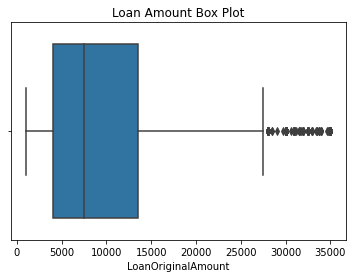

In [19]:
sb.boxplot(x="LoanOriginalAmount", data=loans)
plt.title("Loan Amount Box Plot");

We can notice that the distribution of Loan Amount is multimodal (with three promintent peaks) and strongly skewed to the right. When we look at the box plot of the Loan Amount, we can notice that the median is around 7500, which means half of the data falls below 7500, and 75% of data falls below 13500 dollars. We can also notice some outliers at the higher values of the x axis. <br> 

These outliers could belong to a certain Loan Category. Let's is there a specific category responsible for these outliers.

In [20]:
#calculating the interquartile range of loan amount
iqr = 13500 - 4000
maximum = 13500 + 1.5*iqr
maximum

27750.0

In [21]:
loans[loans["LoanOriginalAmount"]>maximum].groupby(["ListingCategory (numeric)", "ProsperRating (Alpha)"]).agg({"BorrowerRate":"mean", "ListingKey":"count"}).dropna().sort_values(["ListingCategory (numeric)", "ProsperRating (Alpha)"], ascending=(True, False))

BorrowerRate  ListingKey
ListingCategory (numeric) ProsperRating (Alpha)                          
1                         B                          0.142945         282
                          AA                         0.082650           8
                          A                          0.114336         207
2                         B                          0.142196          24
                          AA                         0.086900           1
                          A                          0.110911           9
3                         B                          0.150238          26
                          AA                         0.086900           1
                          A                          0.114075          20
6                         A                          0.119900           1
7                         B                          0.135873          11
                          AA                         0.083900           2
                          A                          0.116943          14
8                         A                          0.103900           1
9                         B                          0.181900           1
13                        B                          0.144200           2
                          A                          0.094900           1
14                        B                          0.143980           5
                          A                          0.110650           4
16                        B                          0.167900           1
18                        AA                         0.080900           1
                          A                          0.109267           3
19                        B                          0.139900           1
20                        B                          0.135500           1

It seems that all the loans that belong to outliers are approved to low-risk, high ProseperRating individuals. Borrower rate is, on average, below 15%. <br>

I would like to understand what are the most frequent Loan categories by exploting the ListingCategory variable.

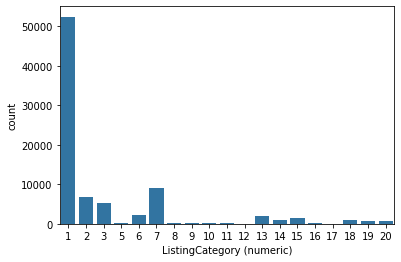

In [22]:
color = sb.color_palette()[0]
ax = sb.countplot(x="ListingCategory (numeric)", data=loans, color=color)


In [23]:
np.log10(loans.groupby("ListingCategory (numeric)")["ListingCategory (numeric)"].count().describe())

count    1.278754
mean     3.644392
std      4.075378
min      1.716003
25%      2.311754
50%      2.883093
75%      3.323561
max      4.719340
Name: ListingCategory (numeric), dtype: float64

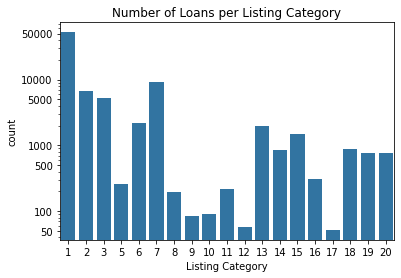

In [24]:
#setting the y-axis to logaritmic scale in order to better understand the differences between categories
bins = 10 ** np.arange(1.7, 4.7+0.5, 0.5)
ticks = [50, 100, 500, 1000, 5000, 10000, 50000]
labels = ['{}'.format(v) for v in ticks]

sb.countplot(x="ListingCategory (numeric)", data=loans, color=color)
plt.yscale("log")
plt.title("Number of Loans per Listing Category")
plt.xlabel("Listing Category")
plt.yticks(ticks, labels);


When comparing categories, it is apparent that the biggest category is 1 which corresponds to Debt Consolidation Loans. Around 60% of the total data belongs to Debt Consolidation category. Here, I applied logarithmic scale to y axis, to better understand the differences between other categories. Based on that, we can conclude that the second biggest category is 7 - Other Loans, and third 2 - Home Improvement.

Listing Categories explained:
- 0:'Not Available', 
- 1:'Debt Consolidation', 
- 2:'Home Improvement', 
- 3:'Business', 
- 4:'Personal Loan', 
- 5:'Student Use', 
- 6:'Auto', 
- 7:'Other', 
- 8:'Baby&Adoption', 
- 9:'Boat', 
- 10:'Cosmetic Procedure', 
- 11:'Engagement Ring', 
- 12:'Green Loans', 
- 13:'Household Expenses', 
- 14:'Large Purchases', 
- 15:'Medical/Dental', 
- 16:'Motorcycle', 
- 17:'RV', 
- 18:'Taxes', 
- 19:'Vacation', 
- 20:'Wedding Loans'

For the final steps of Univariate exploration, I will look at Term variable and ProsperRating variable. Since both of these are categorical variables, it would be best to use count plot in their graphical presentation.

Text(0.5, 1.0, 'Number of loans per length of loan expressed in months')

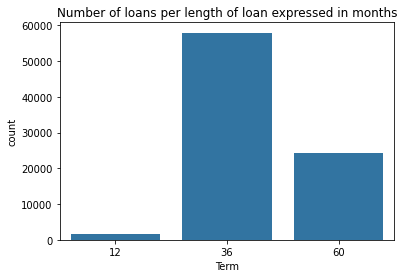

In [25]:
color = sb.color_palette()[0]
sb.countplot(x="Term", data=loans, color=color)
plt.title("Number of loans per length of loan expressed in months")

We can notice that there are only three terms in the data - 12, 36 and 60 months. We notice that most of the loans is given on a three-year period, almost 60000. There are around 25000 loans given on a period of 5 years, and less than 2000 on a period of a year. What I will further investigate in the bivariate and multivariate exploration is the correlation between the Term and Loan Amount as well as the Borrower Rate.

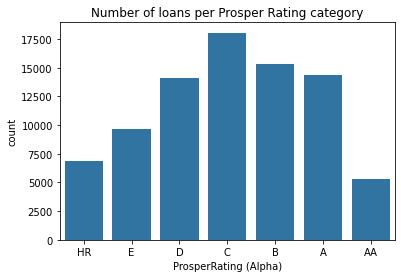

In [26]:
categories = ["HR", "E", "D", "C", "B", "A", "AA"]
ratings = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
loans["ProsperRating (Alpha)"] = loans["ProsperRating (Alpha)"].astype(ratings)
sb.countplot(x="ProsperRating (Alpha)", data=loans, color=color)
plt.title("Number of loans per Prosper Rating category");

The above credit-category chart reflects the Prosper classification at the end of our sample period. A major change in credit-category criteria occurred on February 12, 2007. At that time credit scores below 520 were disqualified and the credit-category tratification was finalized as follows: <br>
Category(score): HR(520–559),  E(560–599), D(600–639), C(640–679), B(680–719), A(720–759), AA(760–900). <br>

I used bar chart to preset the number of loans per Prosper Rating category. This category shows the risk assigned to the loan at the moment of listing. HR represents the highest risk category, while the AA represents the category with lowest risk loans. We can notice that there are the most loans in C category, and least loans in AA category, perhaps because the low risk is related to a high collateral, and individuals from that group either do not need loans that much, or they are in minority compared to other loan users. <br>

Now I will proceed to conduct the Bivariate exploration. Here I want to better understand the individual relationships between the BorrowerRate and each of the previously explored variables.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was an interesting peak at the distribution of BorrowerRate at around 32%. After some deeper analysis I discovered that all of the loans with this high BorrowerRate were in the high-risk group with low ProsperRatings. Also, what was interesting is that the LoanOriginalAmounts for these loans were not high, most of them were around or below 5000 on average. <br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating LoanOriginalAmount, there seemed to be a lot of outliers on the high end of x-axis. However, after analysis, I saw that all of these loans were belonging to DebtConsolidation loan category, and were approved to high ProsperityRating individuals.

When exploring most common types of loans approved from the ListingCategory variable, I noticed that more around 60% of the loans were belonging to Debt Consolidation category. It was hard to see the differences between other categories because of the high bar of the Debt Consolidation. Therefore, I applied logaritmic scale to y-scale, which allowed me to notice that the common category following Debt Consolidation were Other, Home Improvement and Business.

## Bivariate Exploration

I will start with exploring the relationship between BorrowerRate and LoanOriginalAmount.

In [27]:
loans["LoanOriginalAmount"].corr(loans["BorrowerRate"])

-0.4149146439961305

Text(0.5, 1.0, 'Relationship between Loan Amount and Borrower Rate')

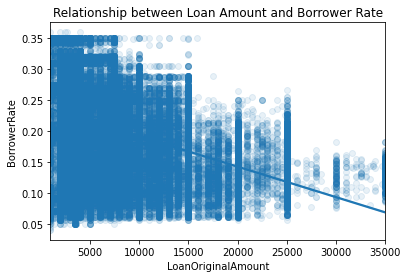

In [28]:
sb.regplot(data=loans, x="LoanOriginalAmount", y="BorrowerRate", scatter_kws={"alpha":0.1});
plt.title("Relationship between Loan Amount and Borrower Rate")

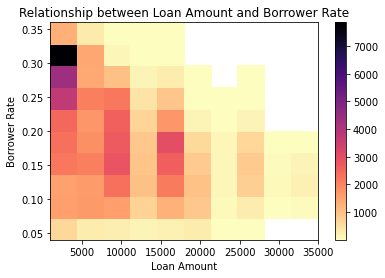

In [29]:
plt.hist2d(x="LoanOriginalAmount", y="BorrowerRate", data=loans, cmap="magma_r", cmin=0.01);
plt.colorbar()
plt.xlabel("Loan Amount")
plt.ylabel("Borrower Rate")
plt.title("Relationship between Loan Amount and Borrower Rate");

When exploring the relationship between the Loan Amount and the Borrower Rate, I first tried to use a scatterplot, but since there are many overlapping observations, I used HeatMap. What we can see is a negative correlation between the two variables, however the relationship does not seem to be linear. Interesting to see is, which has already been previously mentioned, that most of the loans lay below 20000 dollars, and that there aren't that many loans with high Borrower rate as the Loan Amount decreses. <br>

Now, I will look at what are the average BorrowerRates for each of the Term category.

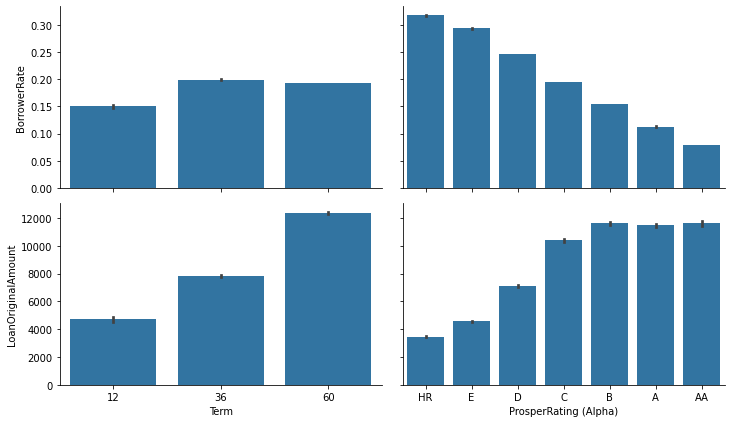

In [30]:
g = sb.PairGrid(data=loans, y_vars=["BorrowerRate", "LoanOriginalAmount"], x_vars=["Term", "ProsperRating (Alpha)"], height=3, aspect=1.7)
g.map(sb.barplot, color=color)

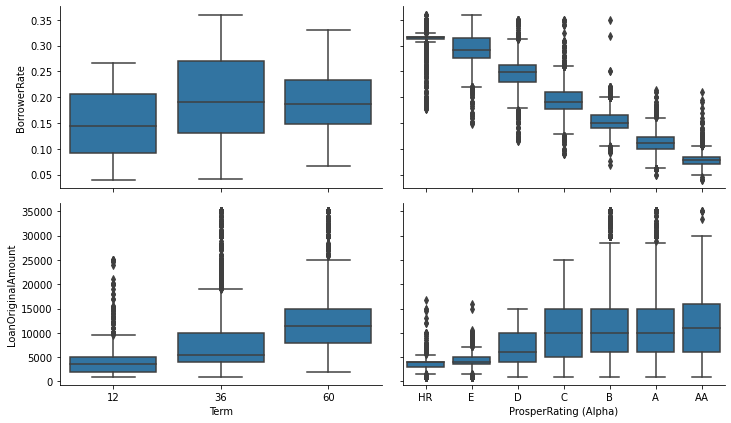

In [33]:
g = sb.PairGrid(data=loans, y_vars=["BorrowerRate", "LoanOriginalAmount"], x_vars=["Term", "ProsperRating (Alpha)"], height=3, aspect=1.7)
g.map(sb.boxplot, color=color)


When looking at the relationship between the Borrower rate and the Length of the loan, the 36-month terms have the highest borrower rate, even higher than the longer terms. Since the uncertainty rises with the increase of time (therefore risk as well), it would mean that the borrower rates should also be higher. Here, more loans with worse Prosper Rating being in this group could be the explanation of the higher borrower rates. Also, the average loan amount seem to be higher as the length of the loan increases. However, the middle box, which represents 36-month term seem to outliers as high as 60-month term box. This indicates there are some loans on high amonts given on shorter periods as well. <br>

Regarding Prosper Rating, it seems to increase as the Borrower Rate decreses. This indicates that bank approve lower-rate loans to peoples with lower risk. We can also see a positive correlation between the Prosper Rating and the Average Loan Amount. It is logical that the individuals with lower risk would have had higher loan amount aprroved, in comparison to high risk individuals. <br>

Let's also take a look at the relationship between the categorical variables.

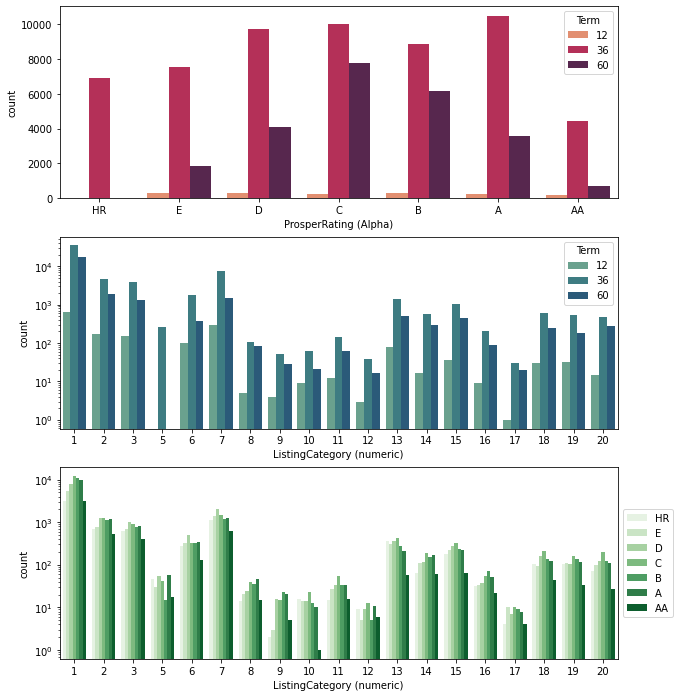

In [34]:
plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
sb.countplot(data=loans, x="ProsperRating (Alpha)", hue="Term", palette="rocket_r")

plt.subplot(3, 1, 2)
sb.countplot(data=loans, x="ListingCategory (numeric)", hue="Term", palette="crest")
plt.yscale("log")

plt.subplot(3, 1, 3)
sb.countplot(data=loans, x="ListingCategory (numeric)", hue="ProsperRating (Alpha)", palette="Greens")
plt.yscale("log")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

When looking at relationships between categorical variables, there does not seem to be any specific connection. We can notice that the 36-month term loans are most prominent across both ProsperRating and Listing Category, but taking into account that they are the by far dominant when looking at loans in total, this is nothing surprising. There are also no interesing observations among the relationship between ProsperRating and ListingCategory. The distribution of ProsperRating across all ListingCategories seem to very very similar to the countplot of ProsperRating from Univariate exploration.

## Key takeaways

Observing the heatmap of BorrowerRate and LoanOriginalAmount, we can spot the negative correlation between the two variables. We can also see that the low amount loans with higher borrower rates are the most common in the dataset. <br>

When comparing BorrowerRate with Term, we notice that 12-month term loans, have a lower borrower rate than the longer-term loans, however, it seems that the average BorrowerRate is similar for 36 and 60-month Terms. On the other hand, LoanOriginalAmount is greater as the Term increases. When it comes to ProsperRating, with better ProsperRating the borrower rate drops, which makes sense, since the higher risk demands higher rates. Also, with the decrease in risk higher loan amounts are approved, on average.

## Multivariate Exploration


First I want to look at the relationship of each numerical variables with both categorical variables, and then I will try to include all the variables into one graphical presentation.

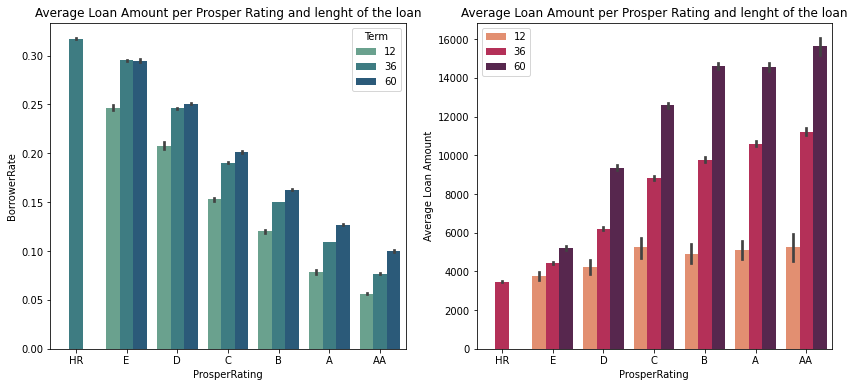

In [35]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sb.barplot(data=loans, x="ProsperRating (Alpha)", y="BorrowerRate", hue="Term", palette="crest");
plt.title("Average Loan Amount per Prosper Rating and lenght of the loan")
plt.xlabel("ProsperRating")

plt.subplot(1, 2, 2)

sb.barplot(data=loans, x="ProsperRating (Alpha)", y="LoanOriginalAmount", hue="Term", palette="rocket_r");
plt.title("Average Loan Amount per Prosper Rating and lenght of the loan")
plt.ylabel("Average Loan Amount")
plt.xlabel("ProsperRating")
plt.legend(loc="upper left");

I used grouped bar plot to compare relationship between the average loan amount per Prosper Rating categories for each loan term category (12, 36 and 60 months). We can notice that with better risk rating, and longer terms, the loan amount also increases on average, across all categories. Only with short term loans, the three top prosper rating categories have, on average, lower loan amounts than for example "C" category. However, this can be the case of less individuals with high risk rating having the need for smaller loans. <br>

I also used grouped bar plot to represent the relationship between average borrower Rate, in this case, per prosper rating, for all term categories. We can observe, once again, the decreasing average borrower rate with the better prosper rating. Between the term categories however, there is an increase of borrower rate with the length of the term.

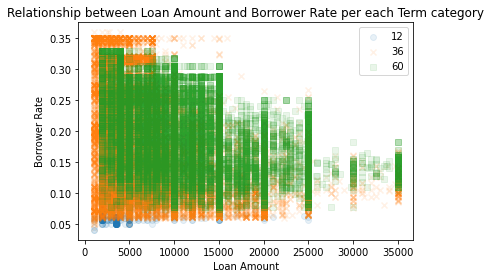

In [36]:
cat_markers = [[12, 'o'], 
               [36, 'x'], 
               [60, 's']]

for cat, marker in cat_markers:
    loans_cat = loans[loans["Term"]==cat]
    plt.scatter(data=loans_cat, x="LoanOriginalAmount", y="BorrowerRate", marker=marker, alpha=0.1)
plt.legend([12, 36, 60])
plt.title("Relationship between Loan Amount and Borrower Rate per each Term category")
plt.xlabel("Loan Amount")
plt.ylabel("Borrower Rate");

On the scatterplot above, I tried comparing relationship between loan amount and borrower rate per each term category. Because of the overplotting it was impossible to draw a rational conclusion. Therefore I decided to use a Facet Grid to represent these on separate scatterplots.

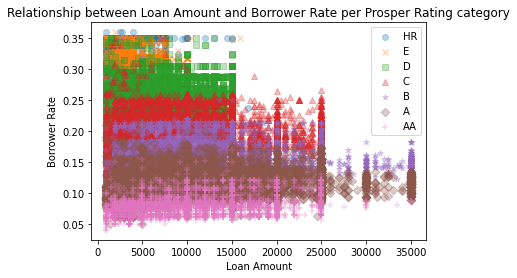

In [37]:
cat_markers = [['HR', 'o'], 
               ['E', 'x'], 
               ['D', 's'], 
               ['C', '^'], 
               ['B', '*'], 
               ['A', 'D'], 
               ['AA', '+']]

for cat, marker in cat_markers:
    loans_cat = loans[loans["ProsperRating (Alpha)"]==cat]
    plt.scatter(data=loans_cat, x="LoanOriginalAmount", y="BorrowerRate", marker=marker, alpha=0.3)
plt.legend(["HR", "E", "D", "C", "B", "A", "AA"])
plt.title("Relationship between Loan Amount and Borrower Rate per Prosper Rating category")
plt.xlabel("Loan Amount")
plt.ylabel("Borrower Rate");

I used scatterplot to compare relationship between loan amount and borrower rate per each prosper rating category. Here, I also ran into the problem of overplotting. Although, we can see that with the increase prosper rating the borrower rate drops, and the loan amount increases, we cannote be certain that some of the data is hidden under the overplotted observation. Therefore, this fourth variable will also be included in the Facet Grid plot.

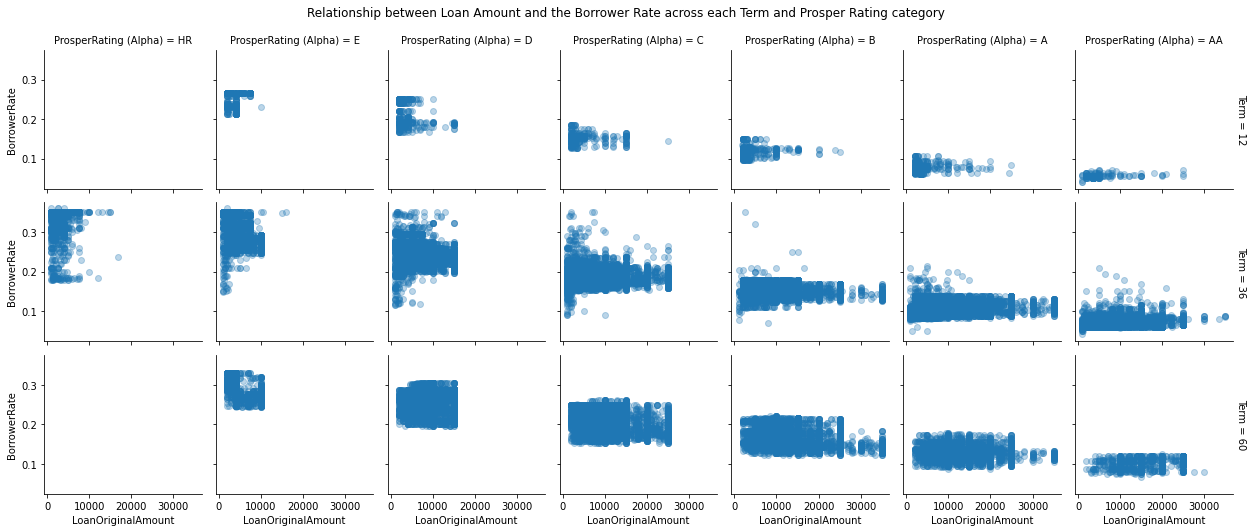

In [38]:
g = sb.FacetGrid(data = loans, col = 'ProsperRating (Alpha)', row = 'Term', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.3)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle("Relationship between Loan Amount and the Borrower Rate across each Term and Prosper Rating category");

Using Facet Grid, I presented a relationship between the 2 numeric variables - Loan Amount and Borrower Rate with a separate graph for each combination of Term and Prosper Rating categories. The conclusion we can draw from these plot is that across all term categories borrower rate decreases with increase in rating (i.e lower rates follow lower risk). Also as the risk decreases, higher loan amounts are approved (with the exception of the highest prosper rating category - AA). If we look at the plots we can notice that in the most-left plots most of the data is concentrated in the upper right corner with high rates and low amounts. As we go to the right, where the better prosper ratings are, we see that the data falls lower on the y axis and it spreads along the x axis. This indicates that lower loan amounts are approved with lower rates, as well as the higher loan amounts.

## Key takeaways

We can conclude there is a negative correlation between BorrowerRate and ProsperRating. Taking into account Term as well, we can conclude that the better the ProsperRating and the shorter the Term  - the lower the BorrowerRate. On the other hand, positive correlation between LoanAmount and BorrowerRate and ProsperRating indicates that as the BorrowerRate increases and the Term prolongs, the higher amounts of loan are approved, on average.

Looking at all the variables plotted together using FacetGrid, we can notice that in conditions of longer Terms and lower ProsperRatings low amount Loans are approved with higher rates As the better prosper ratings improve, and the Terms shorten we see that the data falls lower on the y axis and it spreads along the x axis. This indicates that higher loan amounts are approved with lower rates.